<a href="https://colab.research.google.com/github/brondave12/Data-Preprocessing/blob/main/data_cleaning_two.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries for data preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [21]:
# Import Data
data = pd.read_csv('transactions.csv')

In [22]:
# Display Dataset
display(data)

,transaction_id,user_id,account_age_days,total_transactions_user,avg_amount_user,amount,country,bin_country,channel,merchant_category,promo_used,avs_match,cvv_result,three_ds_flag,transaction_time,shipping_distance_km,is_fraud
0,1,1,141,47,147.93,84.75,FR,FR,web,travel,0,1,1,1,2024-01-06T04:09:39Z,370.95,0
1,2,1,141,47,147.93,107.90,FR,FR,web,travel,0,0,0,0,2024-01-09T20:13:47Z,149.62,0
2,3,1,141,47,147.93,92.36,FR,FR,app,travel,1,1,1,1,2024-01-12T06:20:11Z,164.08,0
3,4,1,141,47,147.93,112.47,FR,FR,web,fashion,0,1,1,1,2024-01-15T17:00:04Z,397.40,0
4,5,1,141,47,147.93,132.91,FR,US,web,electronics,0,1,1,1,2024-01-17T01:27:31Z,935.28,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299690,299691,6000,996,45,27.93,34.07,ES,ES,web,grocery,0,1,1,0,2024-09-29T04:40:54Z,218.55,0
299691,299692,6000,996,45,27.93,68.56,ES,ES,app,travel,0,1,1,1,2024-10-03T08:49:02Z,185.55,0
299692,299693,6000,996,45,27.93,25.02,ES,ES,app,fashion,0,1,1,1,2024-10-26T07:40:38Z,33.50,0
299693,299694,6000,996,45,27.93,23.92,ES,ES,web,gaming,0,0,0,0,2024-10-27T09:31:56Z,71.75,0


In [23]:
# Understaning the dataset(e.g datatypes etc)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299695 entries, 0 to 299694
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   transaction_id           299695 non-null  int64  
 1   user_id                  299695 non-null  int64  
 2   account_age_days         299695 non-null  int64  
 3   total_transactions_user  299695 non-null  int64  
 4   avg_amount_user          299695 non-null  float64
 5   amount                   299695 non-null  float64
 6   country                  299695 non-null  object 
 7   bin_country              299695 non-null  object 
 8   channel                  299695 non-null  object 
 9   merchant_category        299695 non-null  object 
 10  promo_used               299695 non-null  int64  
 11  avs_match                299695 non-null  int64  
 12  cvv_result               299695 non-null  int64  
 13  three_ds_flag            299695 non-null  int64  
 14  tran

In [24]:
# Change datatype to datetype
data['transaction_time'] = pd.to_datetime(data['transaction_time'])

In [25]:
# Confirm the rows and columns in the dataset
data.shape

(299695, 17)

In [26]:
# Remove duplicates
data.drop_duplicates(inplace=True)

In [27]:
# Confirm data rows and columns after duplicate removal
data.shape

(299695, 17)

In [34]:
# Check for missing values
data.isnull().sum()

,0
transaction_id,0
user_id,0
account_age_days,0
total_transactions_user,0
avg_amount_user,0
amount,0
country,0
bin_country,0
channel,0
merchant_category,0


In [ ]:
# Spliting data into training and testing to continue preprocessing stage and feature engineering
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = data.drop('is_fraud', axis=1)
y = data['is_fraud']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

In [32]:
# Drop 'user_id' and 'transaction_id' from X_train and X_test if they exist
columns_to_drop = ['user_id', 'transaction_id']

X_train = X_train.drop(columns=[col for col in columns_to_drop if col in X_train.columns])
X_test = X_test.drop(columns=[col for col in columns_to_drop if col in X_test.columns])

print(f"Shape of X_train after dropping columns: {X_train.shape}")
print(f"Shape of X_test after dropping columns: {X_test.shape}")

Shape of X_train after dropping columns: (239756, 14)
Shape of X_test after dropping columns: (59939, 14)


In [35]:
# Define columns that might cause data leakage and should be dropped
columns_to_drop_leakage = ['account_age_days', 'total_transactions_user', 'avg_amount_user']

# Drop leakage columns from X_train, checking if they exist first
X_train = X_train.drop(columns=[col for col in columns_to_drop_leakage if col in X_train.columns])
# Drop leakage columns from X_test, checking if they exist first
X_test = X_test.drop(columns=[col for col in columns_to_drop_leakage if col in X_test.columns])

print(f"Shape of X_train after dropping leakage columns: {X_train.shape}")
print(f"Shape of X_test after dropping leakage columns: {X_test.shape}")

Shape of X_train after dropping leakage columns: (239756, 11)
Shape of X_test after dropping leakage columns: (59939, 11)


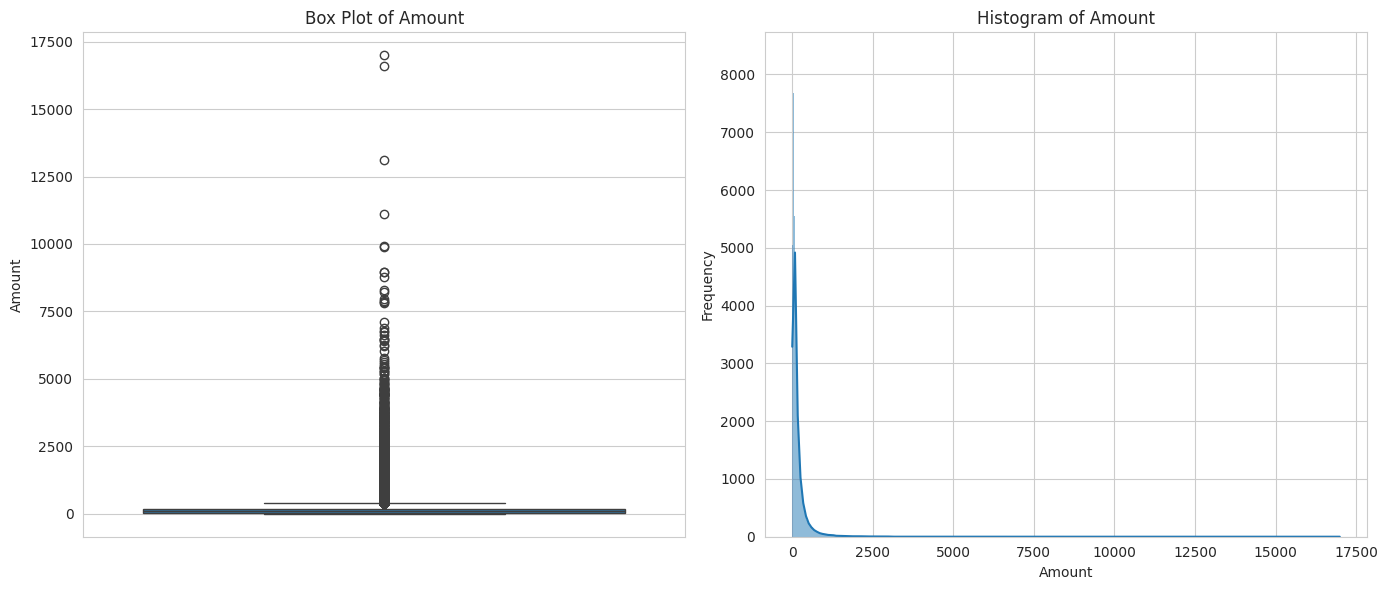

Skewness of 'amount' column: 8.1689
The 'amount' column is positively skewed (skewed to the right). Transformation might be beneficial.


In [36]:
# Import necessary library for skewness calculation
from scipy.stats import skew

# Set plot style
sns.set_style('whitegrid')

# Create a figure with two subplots for box plot and histogram
plt.figure(figsize=(14, 6))

# Subplot 1: Box plot for 'amount' to visualize outliers
plt.subplot(1, 2, 1) # (rows, columns, plot_number)
sns.boxplot(y=X_train['amount'])
plt.title('Box Plot of Amount')
plt.ylabel('Amount')

# Subplot 2: Histogram for 'amount' to visualize distribution and skewness
plt.subplot(1, 2, 2)
sns.histplot(X_train['amount'], kde=True)
plt.title('Histogram of Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Calculate the skewness of the 'amount' column
skewness_value = skew(X_train['amount'])
print(f"Skewness of 'amount' column: {skewness_value:.4f}")

# Interpret the skewness value
if skewness_value > 0.5:
    print("The 'amount' column is positively skewed (skewed to the right). Transformation might be beneficial.")
elif skewness_value < -0.5:
    print("The 'amount' column is negatively skewed (skewed to the left). Transformation might be beneficial.")
else:
    print("The 'amount' column is relatively symmetrically distributed. Transformation might not be necessary.")

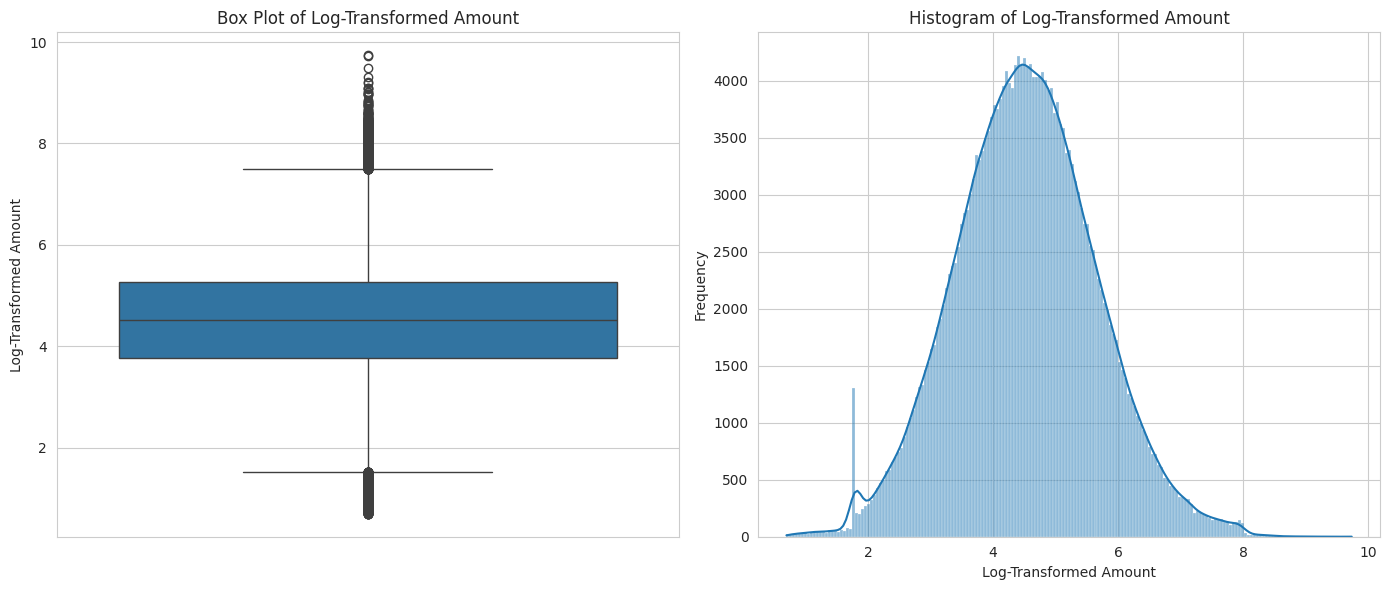

Skewness of log-transformed 'amount' column: 0.0775
The log-transformed 'amount' column is now relatively symmetrically distributed.


In [37]:
# Apply log transformation (log1p) to the 'amount' column for both training and testing sets
X_train['amount_log'] = np.log1p(X_train['amount'])
X_test['amount_log'] = np.log1p(X_test['amount'])

# Create a figure with two subplots for box plot and histogram of the transformed 'amount'
plt.figure(figsize=(14, 6))

# Subplot 1: Box plot for 'amount_log' to visualize outliers after transformation
plt.subplot(1, 2, 1) # (rows, columns, plot_number)
sns.boxplot(y=X_train['amount_log'])
plt.title('Box Plot of Log-Transformed Amount')
plt.ylabel('Log-Transformed Amount')

# Subplot 2: Histogram for 'amount_log' to visualize distribution and skewness after transformation
plt.subplot(1, 2, 2)
sns.histplot(X_train['amount_log'], kde=True)
plt.title('Histogram of Log-Transformed Amount')
plt.xlabel('Log-Transformed Amount')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Calculate the skewness of the log-transformed 'amount' column
skewness_value_log = skew(X_train['amount_log'])
print(f"Skewness of log-transformed 'amount' column: {skewness_value_log:.4f}")

# Interpret the skewness value after transformation
if skewness_value_log > 0.5:
    print("The log-transformed 'amount' column is still positively skewed. Further transformation might be beneficial.")
elif skewness_value_log < -0.5:
    print("The log-transformed 'amount' column is still negatively skewed. Further transformation might be beneficial.")
else:
    print("The log-transformed 'amount' column is now relatively symmetrically distributed.")

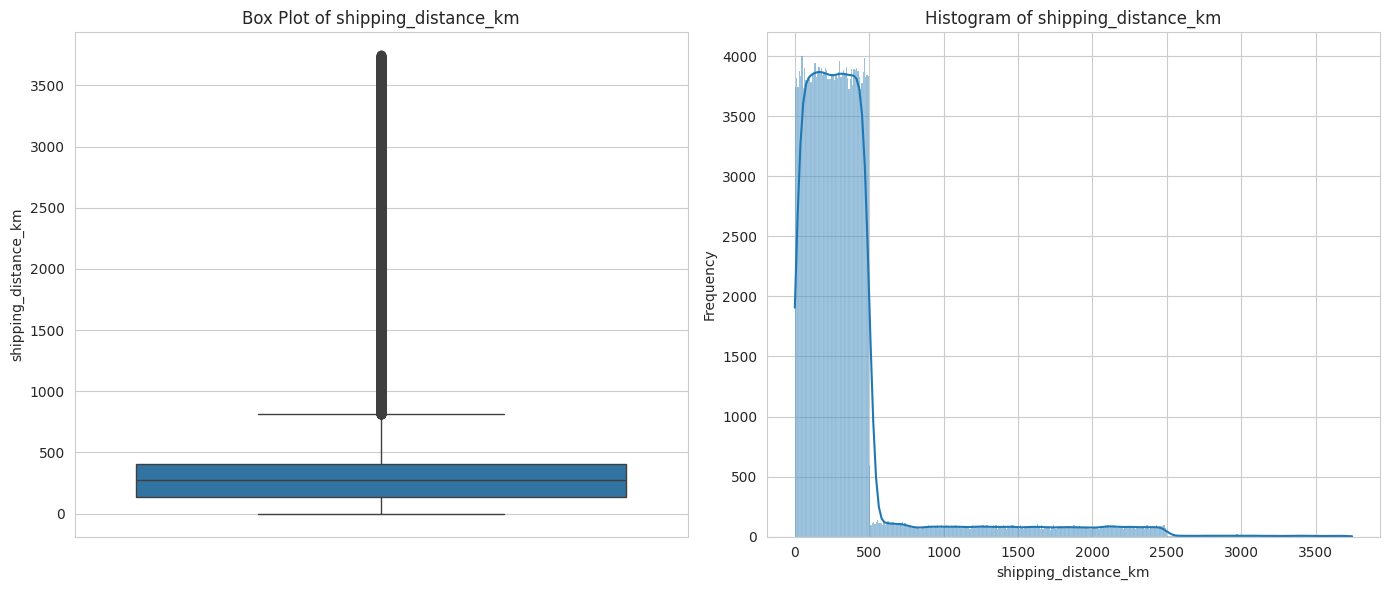

Skewness of 'shipping_distance_km' column: 3.5059
The 'shipping_distance_km' column is positively skewed (skewed to the right). Transformation might be beneficial.

--------------------------------------------------



In [38]:
# List of numerical columns to check for skewness and distribution, excluding 'amount' (already handled) and 'amount_log'
numerical_cols_to_check = ['shipping_distance_km']

for col in numerical_cols_to_check:
    # Create a figure with two subplots for box plot and histogram
    plt.figure(figsize=(14, 6))

    # Subplot 1: Box plot to visualize outliers
    plt.subplot(1, 2, 1) # (rows, columns, plot_number)
    sns.boxplot(y=X_train[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)

    # Subplot 2: Histogram to visualize distribution and skewness
    plt.subplot(1, 2, 2)
    sns.histplot(X_train[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

    # Calculate the skewness of the column
    skewness_value = skew(X_train[col])
    print(f"Skewness of '{col}' column: {skewness_value:.4f}")

    # Interpret the skewness value
    if skewness_value > 0.5:
        print(f"The '{col}' column is positively skewed (skewed to the right). Transformation might be beneficial.")
    elif skewness_value < -0.5:
        print(f"The '{col}' column is negatively skewed (skewed to the left). Transformation might be beneficial.")
    else:
        print(f"The '{col}' column is relatively symmetrically distributed. Transformation might not be necessary.")
    print("\n" + "-"*50 + "\n") # Separator for readability

Number of zero values in 'shipping_distance_km': 0
Applied np.log transformation.


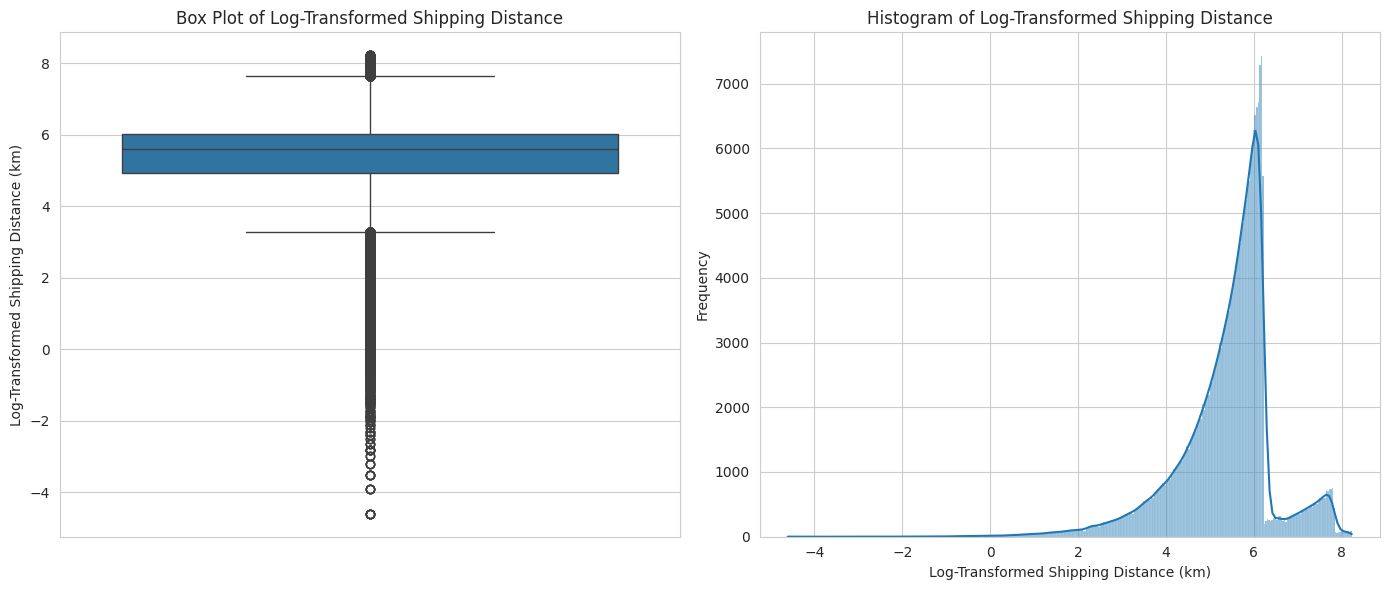

Skewness of log-transformed 'shipping_distance_km' column: -1.1979
The log-transformed 'shipping_distance_km' column is still negatively skewed. Further transformation might be beneficial.


In [39]:
# Check for zero values in 'shipping_distance_km' in the training set
zero_shipping_distance = (X_train['shipping_distance_km'] == 0).sum()
print(f"Number of zero values in 'shipping_distance_km': {zero_shipping_distance}")

# Apply log1p transformation to 'shipping_distance_km' if there are zeros, else apply log transformation
# np.log1p handles zero values gracefully by calculating log(1+x)
if zero_shipping_distance > 0:
    X_train['shipping_distance_km_log'] = np.log1p(X_train['shipping_distance_km'])
    X_test['shipping_distance_km_log'] = np.log1p(X_test['shipping_distance_km'])
    print("Applied np.log1p transformation due to presence of zero values.")
else:
    X_train['shipping_distance_km_log'] = np.log(X_train['shipping_distance_km'])
    X_test['shipping_distance_km_log'] = np.log(X_test['shipping_distance_km'])
    print("Applied np.log transformation.")

# Create a figure with two subplots for box plot and histogram of the transformed 'shipping_distance_km'
plt.figure(figsize=(14, 6))

# Subplot 1: Box plot for 'shipping_distance_km_log' to visualize outliers after transformation
plt.subplot(1, 2, 1) # (rows, columns, plot_number)
sns.boxplot(y=X_train['shipping_distance_km_log'])
plt.title('Box Plot of Log-Transformed Shipping Distance')
plt.ylabel('Log-Transformed Shipping Distance (km)')

# Subplot 2: Histogram for 'shipping_distance_km_log' to visualize distribution and skewness after transformation
plt.subplot(1, 2, 2)
sns.histplot(X_train['shipping_distance_km_log'], kde=True)
plt.title('Histogram of Log-Transformed Shipping Distance')
plt.xlabel('Log-Transformed Shipping Distance (km)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Calculate the skewness of the log-transformed 'shipping_distance_km' column
skewness_value_shipping_log = skew(X_train['shipping_distance_km_log'])
print(f"Skewness of log-transformed 'shipping_distance_km' column: {skewness_value_shipping_log:.4f}")

# Interpret the skewness value after transformation
if skewness_value_shipping_log > 0.5:
    print("The log-transformed 'shipping_distance_km' column is still positively skewed. Further transformation might be beneficial.")
elif skewness_value_shipping_log < -0.5:
    print("The log-transformed 'shipping_distance_km' column is still negatively skewed. Further transformation might be beneficial.")
else:
    print("The log-transformed 'shipping_distance_km' column is now relatively symmetrically distributed.")

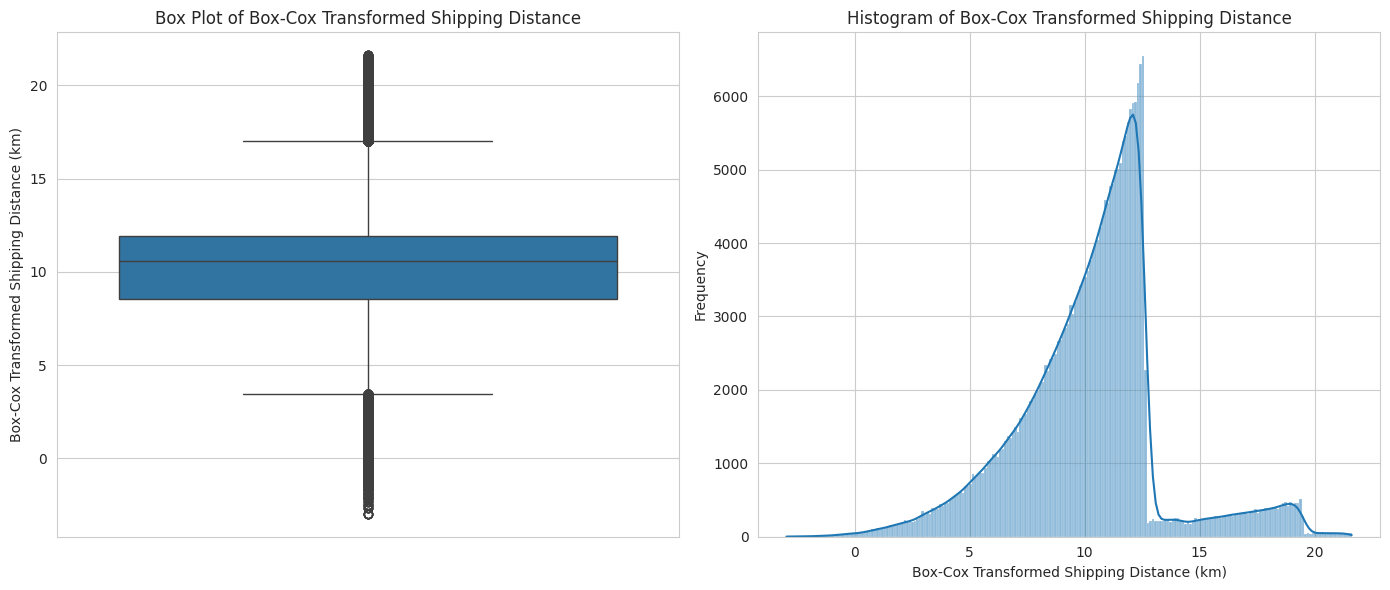

Skewness of Box-Cox transformed 'shipping_distance_km' column: 0.1007
The Box-Cox transformed 'shipping_distance_km' column is now relatively symmetrically distributed.


In [40]:
# Import necessary library for Box-Cox transformation
from scipy.stats import boxcox

# Apply Box-Cox transformation to 'shipping_distance_km' for both training and testing sets
# Box-Cox requires input data to be positive. We've already confirmed there are no zeros.
# boxcox returns the transformed data and the optimal lambda parameter.
# We use the lambda determined from the training data for the test data to avoid data leakage.
X_train['shipping_distance_km_boxcox'], lambda_boxcox = boxcox(X_train['shipping_distance_km'])
X_test['shipping_distance_km_boxcox'] = boxcox(X_test['shipping_distance_km'], lmbda=lambda_boxcox)

# Create a figure with two subplots for box plot and histogram of the Box-Cox transformed 'shipping_distance_km'
plt.figure(figsize=(14, 6))

# Subplot 1: Box plot for 'shipping_distance_km_boxcox' to visualize outliers after transformation
plt.subplot(1, 2, 1) # (rows, columns, plot_number)
sns.boxplot(y=X_train['shipping_distance_km_boxcox'])
plt.title('Box Plot of Box-Cox Transformed Shipping Distance')
plt.ylabel('Box-Cox Transformed Shipping Distance (km)')

# Subplot 2: Histogram for 'shipping_distance_km_boxcox' to visualize distribution and skewness after transformation
plt.subplot(1, 2, 2)
sns.histplot(X_train['shipping_distance_km_boxcox'], kde=True)
plt.title('Histogram of Box-Cox Transformed Shipping Distance')
plt.xlabel('Box-Cox Transformed Shipping Distance (km)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Calculate the skewness of the Box-Cox transformed 'shipping_distance_km' column
skewness_value_shipping_boxcox = skew(X_train['shipping_distance_km_boxcox'])
print(f"Skewness of Box-Cox transformed 'shipping_distance_km' column: {skewness_value_shipping_boxcox:.4f}")

# Interpret the skewness value after transformation
if skewness_value_shipping_boxcox > 0.5:
    print("The Box-Cox transformed 'shipping_distance_km' column is still positively skewed. Further transformation might be beneficial.")
elif skewness_value_shipping_boxcox < -0.5:
    print("The Box-Cox transformed 'shipping_distance_km' column is still negatively skewed. Further transformation might be beneficial.")
else:
    print("The Box-Cox transformed 'shipping_distance_km' column is now relatively symmetrically distributed.")

In [41]:
# Drop the original 'amount' and 'shipping_distance_km' columns from X_train and X_test
columns_to_drop_original = ['amount', 'shipping_distance_km']

X_train = X_train.drop(columns=[col for col in columns_to_drop_original if col in X_train.columns])
X_test = X_test.drop(columns=[col for col in columns_to_drop_original if col in X_test.columns])

print(f"Shape of X_train after dropping original columns: {X_train.shape}")
print(f"Shape of X_test after dropping original columns: {X_test.shape}")

Shape of X_train after dropping original columns: (239756, 12)
Shape of X_test after dropping original columns: (59939, 12)


--- Correlation Matrix for Numerical Columns (Training Data) ---


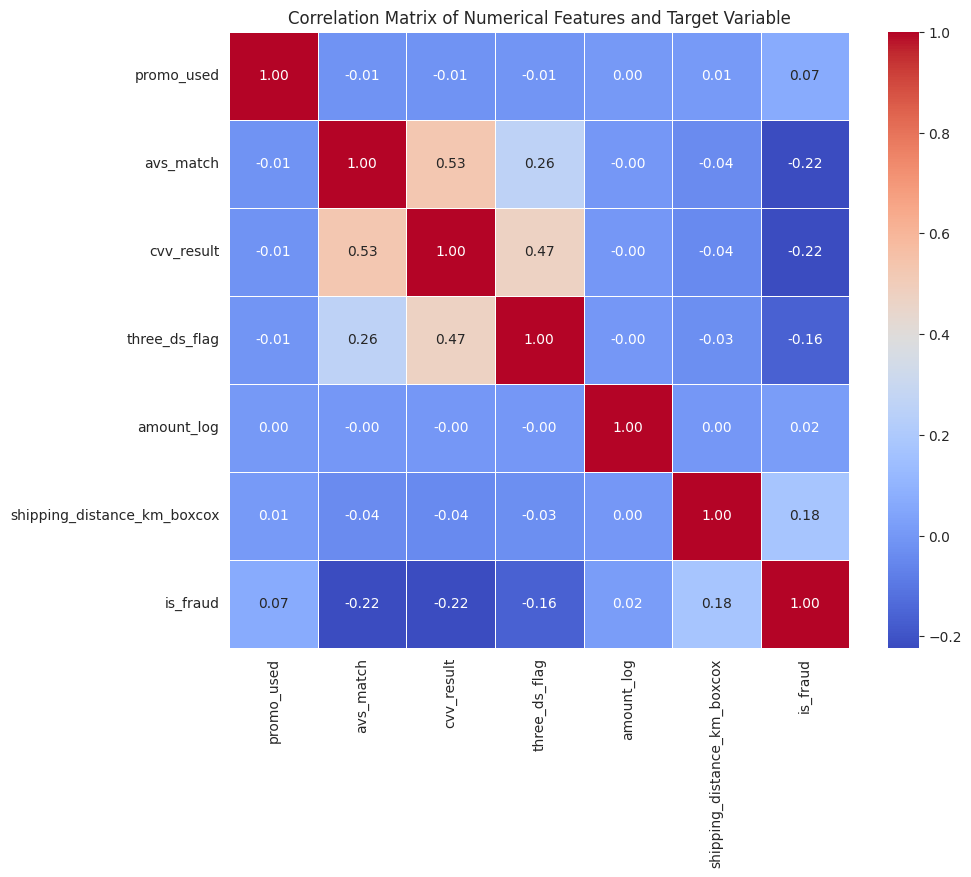


--- Chi-Square Test for Categorical Columns (Training Data) ---

Analyzing categorical column: 'country'
Chi-square statistic: 88.1130
P-value: 0.0000
Conclusion: Reject the null hypothesis. There is a statistically significant association between 'country' and 'is_fraud'.

Analyzing categorical column: 'bin_country'
Chi-square statistic: 40.1651
P-value: 0.0000
Conclusion: Reject the null hypothesis. There is a statistically significant association between 'bin_country' and 'is_fraud'.

Analyzing categorical column: 'channel'
Chi-square statistic: 2130.5005
P-value: 0.0000
Conclusion: Reject the null hypothesis. There is a statistically significant association between 'channel' and 'is_fraud'.

Analyzing categorical column: 'merchant_category'
Chi-square statistic: 8.2398
P-value: 0.0832
Conclusion: Fail to reject the null hypothesis. There is no statistically significant association between 'merchant_category' and 'is_fraud'.

Analysis complete.


In [47]:
# Import necessary libraries for correlation and chi-square test
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns

print("--- Correlation Matrix for Numerical Columns (Training Data) ---")

# Identify numerical columns in X_train (excluding 'transaction_time' which is datetime)
numerical_cols = X_train.select_dtypes(include=np.number).columns.tolist()

# Combine numerical columns from X_train with y_train for correlation analysis
correlation_data = pd.concat([X_train[numerical_cols], y_train], axis=1)

# Calculate the correlation matrix
arr_matrix = correlation_data.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(arr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features and Target Variable')
plt.show()

print("\n--- Chi-Square Test for Categorical Columns (Training Data) ---")

# Identify categorical columns in X_train
categorical_cols = X_train.select_dtypes(include='object').columns.tolist()

# Perform Chi-Square test for each categorical column against the target variable (is_fraud)
for col in categorical_cols:
    print(f"\nAnalyzing categorical column: '{col}'")
    # Create a contingency table
    contingency_table = pd.crosstab(X_train[col], y_train)

    # Perform Chi-Square test
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)

    print(f"Chi-square statistic: {chi2:.4f}")
    print(f"P-value: {p_value:.4f}")

    # Interpret the p-value
    alpha = 0.05 # Significance level
    if p_value < alpha:
        print(f"Conclusion: Reject the null hypothesis. There is a statistically significant association between '{col}' and 'is_fraud'.")
    else:
        print(f"Conclusion: Fail to reject the null hypothesis. There is no statistically significant association between '{col}' and 'is_fraud'.")

print("\nAnalysis complete.")

In [45]:
# Drop the 'shipping_distance_km_log' column as 'shipping_distance_km_boxcox' is the preferred transformed feature
columns_to_drop_redundant = ['shipping_distance_km_log']

X_train = X_train.drop(columns=[col for col in columns_to_drop_redundant if col in X_train.columns])
X_test = X_test.drop(columns=[col for col in columns_to_drop_redundant if col in X_test.columns])

print(f"Shape of X_train after dropping redundant log-transformed column: {X_train.shape}")
print(f"Shape of X_test after dropping redundant log-transformed column: {X_test.shape}")

Shape of X_train after dropping redundant log-transformed column: (239756, 11)
Shape of X_test after dropping redundant log-transformed column: (59939, 11)


In [49]:
# Import necessary libraries for preprocessing and logistic regression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

# Identify numerical and categorical columns for preprocessing
numerical_cols = X_train.select_dtypes(include=np.number).columns.tolist()
categorical_cols = X_train.select_dtypes(include='object').columns.tolist()

# Create preprocessing pipelines for numerical and categorical features
numerical_transformer = StandardScaler()
# Adjust OneHotEncoder to drop the first category to avoid multicollinearity
categorical_transformer = OneHotEncoder(handle_unknown='ignore', drop='first')

# Create a column transformer to apply different transformations to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# First, transform the data using the preprocessor
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Get feature names after one-hot encoding
onehot_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)
processed_feature_names = numerical_cols + list(onehot_feature_names)

# Convert processed data back to DataFrame for statsmodels
X_train_processed_df = pd.DataFrame(X_train_processed, columns=processed_feature_names, index=X_train.index)
X_test_processed_df = pd.DataFrame(X_test_processed, columns=processed_feature_names, index=X_test.index)

# Add a constant term for statsmodels (intercept)
X_train_processed_df = sm.add_constant(X_train_processed_df)
X_test_processed_df = sm.add_constant(X_test_processed_df, has_constant='add') # Add for test as well

# Fit Logistic Regression model using statsmodels
logit_model = sm.Logit(y_train, X_train_processed_df)
result = logit_model.fit()

# Print the summary of the logistic regression model
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.067117
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:               is_fraud   No. Observations:               239756
Model:                          Logit   Df Residuals:                   239726
Method:                           MLE   Df Model:                           29
Date:                Fri, 21 Nov 2025   Pseudo R-squ.:                  0.3688
Time:                        19:50:47   Log-Likelihood:                -16092.
converged:                       True   LL-Null:                       -25493.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -6.5197      0.082    -79.086      0.000  

In [ ]:
# Import necessary library for VIF calculation
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Prepare the DataFrame for VIF calculation by dropping the constant term
X_for_vif = X_train_processed_df.drop('const', axis=1)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X_for_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_for_vif.values, i) for i in range(X_for_vif.shape[1])]

# Sort VIF values for better readability
vif_data = vif_data.sort_values(by="VIF", ascending=False).reset_index(drop=True)

print("Variance Inflation Factor (VIF) scores:")
display(vif_data)

# Interpretation guidance
print("\n--- VIF Interpretation ---")
print("A VIF score of:")
print("- 1: Indicates no correlation between the variable and any other variables.")
print("- 1 to 5: Indicates moderate correlation, but usually not severe enough to warrant corrective measures.")
print("- > 5 or 10: Indicates high correlation, which can be problematic for model interpretation and stability. Further investigation might be needed.")

In [51]:
# Identify bin_country columns to drop from the processed DataFrames
bin_country_cols_to_drop = [col for col in X_train_processed_df.columns if col.startswith('bin_country_')]

# Drop these columns from X_train_processed_df and X_test_processed_df
X_train_processed_df = X_train_processed_df.drop(columns=bin_country_cols_to_drop)
X_test_processed_df = X_test_processed_df.drop(columns=bin_country_cols_to_drop)

print("Shapes after dropping bin_country columns:")
print(f"X_train_processed_df shape: {X_train_processed_df.shape}")
print(f"X_test_processed_df shape: {X_test_processed_df.shape}")

# Re-calculate VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Prepare the DataFrame for VIF calculation by dropping the constant term
X_for_vif = X_train_processed_df.drop('const', axis=1)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X_for_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_for_vif.values, i) for i in range(X_for_vif.shape[1])]

# Sort VIF values for better readability
vif_data = vif_data.sort_values(by="VIF", ascending=False).reset_index(drop=True)

print("\nVariance Inflation Factor (VIF) scores after dropping 'bin_country' columns:")
display(vif_data)

print("\n--- VIF Interpretation ---")
print("A VIF score of:")
print("- 1: Indicates no correlation between the variable and any other variables.")
print("- 1 to 5: Indicates moderate correlation, but usually not severe enough to warrant corrective measures.")
print("- > 5 or 10: Indicates high correlation, which can be problematic for model interpretation and stability. Further investigation might be needed.")

Shapes after dropping bin_country columns:
X_train_processed_df shape: (239756, 21)
X_test_processed_df shape: (59939, 21)

Variance Inflation Factor (VIF) scores after dropping 'bin_country' columns:


,feature,VIF
0,channel_web,1.900497
1,merchant_category_travel,1.674596
2,merchant_category_grocery,1.671642
3,merchant_category_gaming,1.669760
4,cvv_result,1.669482
5,merchant_category_fashion,1.666735
6,avs_match,1.391801
7,country_US,1.368744
8,country_NL,1.343769
9,country_GB,1.341622



--- VIF Interpretation ---
A VIF score of:
- 1: Indicates no correlation between the variable and any other variables.
- 1 to 5: Indicates moderate correlation, but usually not severe enough to warrant corrective measures.
- > 5 or 10: Indicates high correlation, which can be problematic for model interpretation and stability. Further investigation might be needed.


In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

# Initialize and train the Logistic Regression model
sklearn_logit_model = LogisticRegression(solver='liblinear', random_state=42, class_weight='balanced') # Using 'liblinear' for small datasets, 'balanced' to handle potential imbalance
sklearn_logit_model.fit(X_train_processed_df.drop('const', axis=1), y_train)

print("Logistic Regression model trained successfully using sklearn.")


Logistic Regression model trained successfully using sklearn.


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.86      0.92     58640
           1       0.11      0.84      0.20      1299

    accuracy                           0.86     59939
   macro avg       0.56      0.85      0.56     59939
weighted avg       0.98      0.86      0.91     59939


ROC AUC Score: 0.9211

Confusion Matrix:


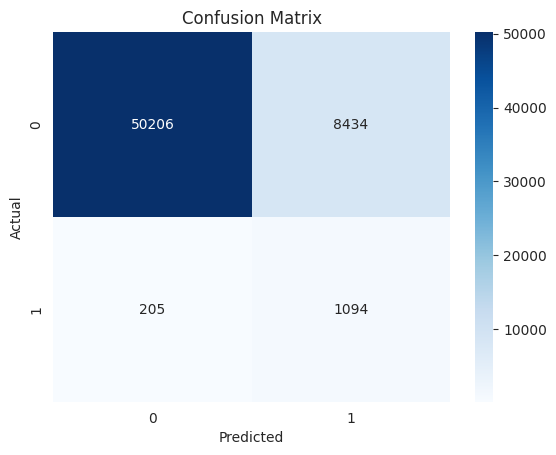

In [53]:
# Make predictions on the test set
y_pred_proba = sklearn_logit_model.predict_proba(X_test_processed_df.drop('const', axis=1))[:, 1]
y_pred = sklearn_logit_model.predict(X_test_processed_df.drop('const', axis=1))

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print(f"\nROC AUC Score: {roc_auc_score(y_test, y_pred_proba):.4f}")

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


--- Training Decision Tree Classifier ---
Decision Tree Classifier trained successfully.

--- Evaluating Decision Tree Classifier on Test Set ---
Classification Report (Decision Tree):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     58640
           1       0.58      0.56      0.57      1299

    accuracy                           0.98     59939
   macro avg       0.79      0.78      0.78     59939
weighted avg       0.98      0.98      0.98     59939


ROC AUC Score (Decision Tree): 0.7761

Confusion Matrix (Decision Tree):


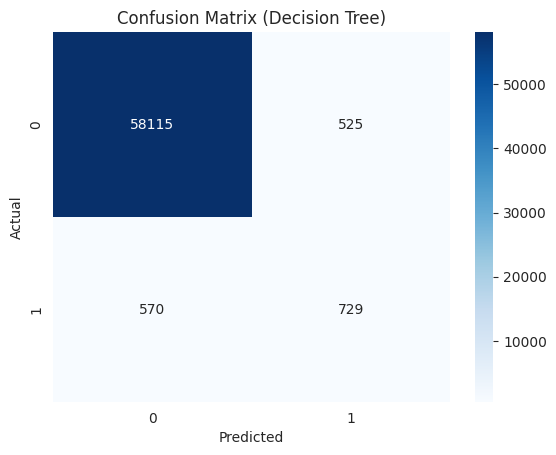

In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

print("\n--- Training Decision Tree Classifier ---")
# Initialize and train the Decision Tree Classifier
# Using class_weight='balanced' to handle potential imbalance
dtree_model = DecisionTreeClassifier(random_state=42, class_weight='balanced')
dtree_model.fit(X_train_processed_df.drop('const', axis=1), y_train)

print("Decision Tree Classifier trained successfully.")

print("\n--- Evaluating Decision Tree Classifier on Test Set ---")
# Make predictions on the test set
y_pred_proba_dtree = dtree_model.predict_proba(X_test_processed_df.drop('const', axis=1))[:, 1]
y_pred_dtree = dtree_model.predict(X_test_processed_df.drop('const', axis=1))

# Evaluate the model
print("Classification Report (Decision Tree):")
print(classification_report(y_test, y_pred_dtree))

print(f"\nROC AUC Score (Decision Tree): {roc_auc_score(y_test, y_pred_proba_dtree):.4f}")

print("\nConfusion Matrix (Decision Tree):")
cm_dtree = confusion_matrix(y_test, y_pred_dtree)
sns.heatmap(cm_dtree, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Decision Tree)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


--- Training Random Forest Classifier ---
Random Forest Classifier trained successfully.

--- Evaluating Random Forest Classifier on Test Set ---
Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     58640
           1       0.86      0.54      0.66      1299

    accuracy                           0.99     59939
   macro avg       0.92      0.77      0.83     59939
weighted avg       0.99      0.99      0.99     59939


ROC AUC Score (Random Forest): 0.9219

Confusion Matrix (Random Forest):


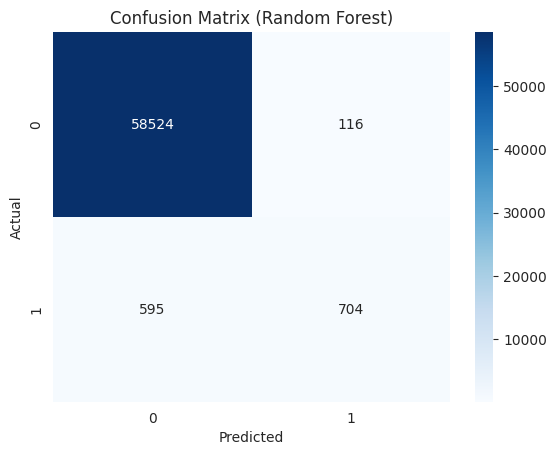

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

print("\n--- Training Random Forest Classifier ---")
# Initialize and train the Random Forest Classifier
# Using class_weight='balanced' to handle potential imbalance
# You might want to tune hyperparameters like n_estimators, max_depth, etc., for better performance
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_model.fit(X_train_processed_df.drop('const', axis=1), y_train)

print("Random Forest Classifier trained successfully.")

print("\n--- Evaluating Random Forest Classifier on Test Set ---")
# Make predictions on the test set
y_pred_proba_rf = rf_model.predict_proba(X_test_processed_df.drop('const', axis=1))[:, 1]
y_pred_rf = rf_model.predict(X_test_processed_df.drop('const', axis=1))

# Evaluate the model
print("Classification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))

print(f"\nROC AUC Score (Random Forest): {roc_auc_score(y_test, y_pred_proba_rf):.4f}")

print("\nConfusion Matrix (Random Forest):")
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Random Forest)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


--- Training K-Nearest Neighbors (KNN) Classifier ---
KNN Classifier trained successfully.

--- Evaluating KNN Classifier on Test Set ---
Classification Report (KNN):
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     58640
           1       0.73      0.34      0.46      1299

    accuracy                           0.98     59939
   macro avg       0.86      0.67      0.73     59939
weighted avg       0.98      0.98      0.98     59939


ROC AUC Score (KNN): 0.8104

Confusion Matrix (KNN):


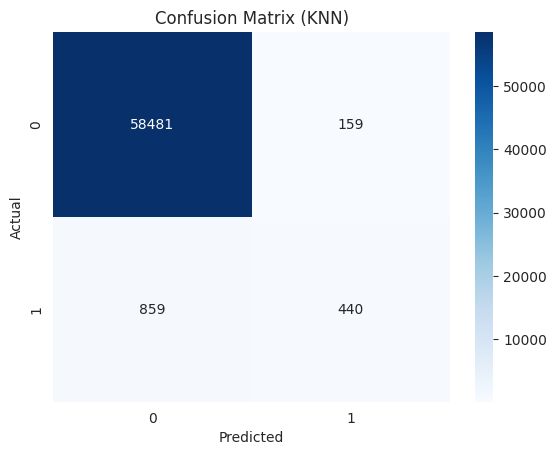

In [57]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

print("\n--- Training K-Nearest Neighbors (KNN) Classifier ---")
# Initialize and train the KNN Classifier
# KNN does not have a class_weight parameter like tree-based models or logistic regression.
# Handling class imbalance in KNN typically involves resampling techniques (e.g., SMOTE) or
# adjusting decision thresholds, which are beyond simple model initialization.
# For now, we'll proceed with default weights.
knn_model = KNeighborsClassifier(n_neighbors=5) # n_neighbors is a key hyperparameter for KNN
knn_model.fit(X_train_processed_df.drop('const', axis=1), y_train)

print("KNN Classifier trained successfully.")

print("\n--- Evaluating KNN Classifier on Test Set ---")
# Make predictions on the test set
y_pred_proba_knn = knn_model.predict_proba(X_test_processed_df.drop('const', axis=1))[:, 1]
y_pred_knn = knn_model.predict(X_test_processed_df.drop('const', axis=1))

# Evaluate the model
print("Classification Report (KNN):")
print(classification_report(y_test, y_pred_knn))

print(f"\nROC AUC Score (KNN): {roc_auc_score(y_test, y_pred_proba_knn):.4f}")

print("\nConfusion Matrix (KNN):")
cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (KNN)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


--- Training Support Vector Machine (SVM) Classifier (LinearSVC) ---
SVM Classifier (LinearSVC) trained successfully.

--- Evaluating SVM Classifier (LinearSVC) on Test Set ---
Classification Report (SVM - LinearSVC):
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     58640
           1       0.76      0.22      0.34      1299

    accuracy                           0.98     59939
   macro avg       0.87      0.61      0.66     59939
weighted avg       0.98      0.98      0.98     59939


ROC AUC Score (SVM - LinearSVC): 0.9208

Confusion Matrix (SVM - LinearSVC):


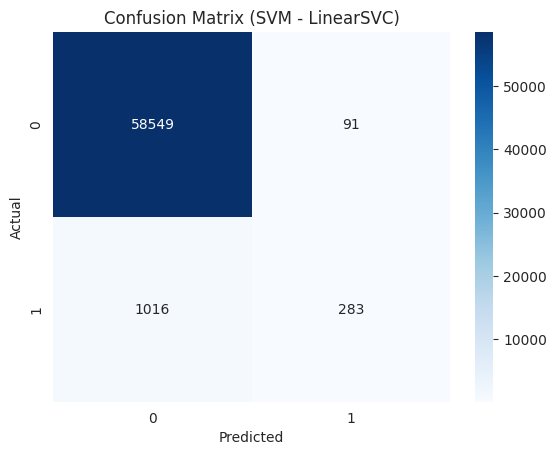

In [58]:
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

print("\n--- Training Support Vector Machine (SVM) Classifier (LinearSVC) ---")
# Initialize and train the SVM Classifier (using LinearSVC for efficiency on large datasets)
# LinearSVC does not directly provide predict_proba, so we use CalibratedClassifierCV for ROC AUC.
# class_weight='balanced' is used to handle potential imbalance.

linear_svc = LinearSVC(random_state=42, class_weight='balanced', dual=False) # dual=False for n_samples > n_features
# Calibrate the LinearSVC to get probability estimates for ROC AUC score
svm_model = CalibratedClassifierCV(linear_svc, method='isotonic', cv=5) # cv=5 for cross-validation
svm_model.fit(X_train_processed_df.drop('const', axis=1), y_train)

print("SVM Classifier (LinearSVC) trained successfully.")

print("\n--- Evaluating SVM Classifier (LinearSVC) on Test Set ---")
# Make predictions on the test set
y_pred_proba_svm = svm_model.predict_proba(X_test_processed_df.drop('const', axis=1))[:, 1]
y_pred_svm = svm_model.predict(X_test_processed_df.drop('const', axis=1))

# Evaluate the model
print("Classification Report (SVM - LinearSVC):")
print(classification_report(y_test, y_pred_svm))

print(f"\nROC AUC Score (SVM - LinearSVC): {roc_auc_score(y_test, y_pred_proba_svm):.4f}")

print("\nConfusion Matrix (SVM - LinearSVC):")
cm_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (SVM - LinearSVC)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


--- Training XGBoost Classifier ---
XGBoost Classifier trained successfully.

--- Evaluating XGBoost Classifier on Test Set ---
Classification Report (XGBoost):
              precision    recall  f1-score   support

           0       1.00      0.94      0.97     58640
           1       0.25      0.84      0.38      1299

    accuracy                           0.94     59939
   macro avg       0.62      0.89      0.68     59939
weighted avg       0.98      0.94      0.96     59939


ROC AUC Score (XGBoost): 0.9556

Confusion Matrix (XGBoost):


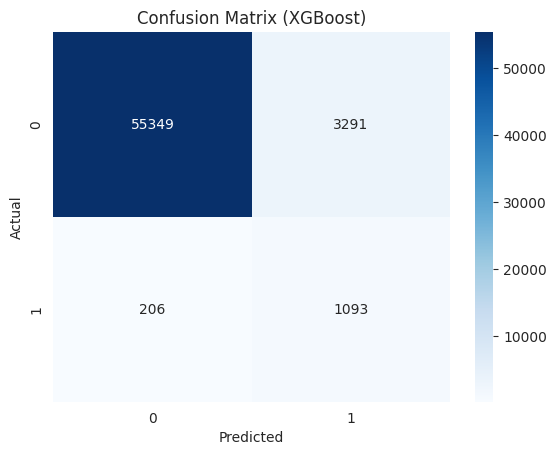

In [56]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

print("\n--- Training XGBoost Classifier ---")
# Initialize and train the XGBoost Classifier
# For imbalanced datasets, scale_pos_weight can be used, which is (count(negative_class) / count(positive_class))
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

xgb_model = XGBClassifier(
    random_state=42,
    use_label_encoder=False, # Suppress the warning
    eval_metric='logloss',    # Evaluation metric for binary classification
    scale_pos_weight=scale_pos_weight # Handle class imbalance
)
xgb_model.fit(X_train_processed_df.drop('const', axis=1), y_train)

print("XGBoost Classifier trained successfully.")

print("\n--- Evaluating XGBoost Classifier on Test Set ---")
# Make predictions on the test set
y_pred_proba_xgb = xgb_model.predict_proba(X_test_processed_df.drop('const', axis=1))[:, 1]
y_pred_xgb = xgb_model.predict(X_test_processed_df.drop('const', axis=1))

# Evaluate the model
print("Classification Report (XGBoost):")
print(classification_report(y_test, y_pred_xgb))

print(f"\nROC AUC Score (XGBoost): {roc_auc_score(y_test, y_pred_proba_xgb):.4f}")

print("\nConfusion Matrix (XGBoost):")
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (XGBoost)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [59]:
# Based on the previous analysis, here is a summary of the model performances:
#
# | Model                  | Fraud Precision | Fraud Recall | Fraud F1-score | ROC AUC Score | False Positives | False Negatives |
# | :--------------------- | :-------------- | :----------- | :------------- | :------------ | :-------------- | :-------------- |
# | **Logistic Regression**| 0.11            | **0.84**     | 0.20           | 0.9211        | 8434            | 205             |
# | **Decision Tree**      | 0.58            | 0.56         | 0.57           | 0.7761        | 525             | 570             |
# | **Random Forest**      | **0.86**        | 0.54         | **0.66**       | 0.9219        | 116             | 595             |
# | **XGBoost**            | 0.25            | **0.84**     | 0.38           | **0.9556**    | 3291            | **206**         |
# | **KNN**                | 0.73            | 0.34         | 0.46           | 0.8104        | 159             | 859             |
# | **SVM (LinearSVC)**    | 0.76            | 0.22         | 0.34           | 0.9208        | **91**          | 1016            |
#
# **Key Takeaways:**
# - **XGBoost** shows the **highest ROC AUC score (0.9556)**, indicating the best overall ability to distinguish between fraudulent and non-fraudulent transactions. It also achieves very high recall for fraud (0.84), meaning it catches most actual fraudulent transactions, making it a strong candidate if identifying as much fraud as possible is paramount.
# - **Random Forest** offers the **best balance between precision and recall (highest Fraud F1-score 0.66)** and has very low false positives (116). This makes it excellent if minimizing false alarms is a high priority while still effectively detecting fraud.
# - **Logistic Regression** also achieves high recall for fraud (0.84) but suffers from very low precision (0.11) and a high number of false positives (8434).
# - **SVM (LinearSVC)** has the **lowest false positives (91)**, meaning it's highly precise when it predicts fraud, but it also has the lowest recall (0.22), missing a large amount of actual fraud.
# - **Decision Tree** and **KNN** provide moderate performance, generally trading off recall for better precision compared to Logistic Regression and XGBoost.
#
# The 'best' model depends on the specific priorities and costs associated with false positives versus false negatives in your fraud detection system.